# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOF results from the MEG Data. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. 

In [1]:
# Imports
import numpy as np
import os

# Code to run all the analyses is in a custom module for MEG-FOOF data analysis (om - omega-mappin)
from om import *             

# Set plots to display inline
%matplotlib inline

In [2]:
## Check what data is available
# Set file paths
foof_data_path = '/Users/thomasdonoghue/Documents/Research/1-Projects/OMEGA/2-Data/MEG/3-FOOF/'
files = os.listdir(foof_data_path)

# Get a list of files and list of available subjects
files = clean_file_list(files, 'Foof_Vertex')
sub_nums = get_sub_nums(files)

# Print out the list of subject numbers
print('\n Number of Subjects available: ' + str(len(sub_nums)) + '\n')
print('Subject numbers with FOOF data available: \n' + str(sub_nums) + '\n')


 Number of Subjects available: 13

Subject numbers with FOOF data available: 
[124340, 220216, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 504997, 548027, 704814]



### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [3]:
# Import an individual subject of FOOF PSD results
subj = sub_nums[0]
meg_subj = MegData()
meg_subj.import_foof(subj)

In [4]:
# Use oscillatory bands to find oscillations per band per vertex
osc = Osc()                      # Osc is an object that stores parameters for oscillatory bands
meg_subj.osc_bands_vertex(osc)

# This date can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.save_viz()

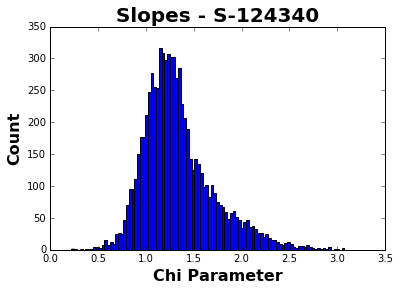

In [5]:
# Plot the distribution of slopes, as computed by FOOF
meg_subj.plot_slopes()

In [6]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Number of oscillations: 20970


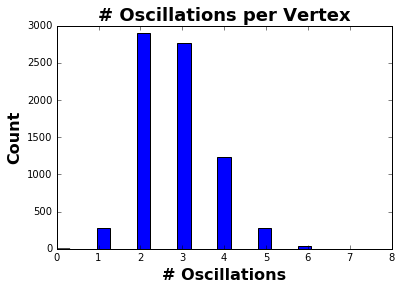

In [7]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.nOscs))
meg_subj.plot_hist_count()

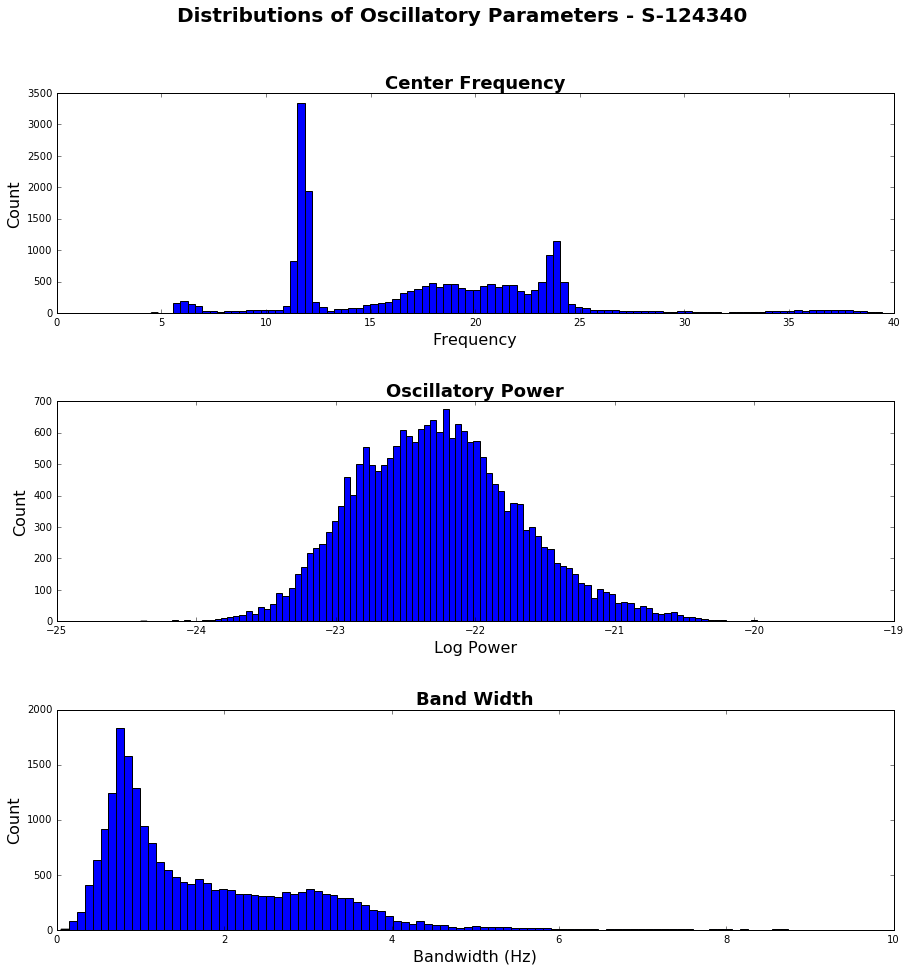

In [8]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
meg_subj.plot_all_oscs()

Center-BW Corr: 0.335061502587 with p of : 0.0
Center-Power Corr: -0.473679819267 with p of : 0.0
BW-Power Corr: -0.262999580433 with p of : 0.0


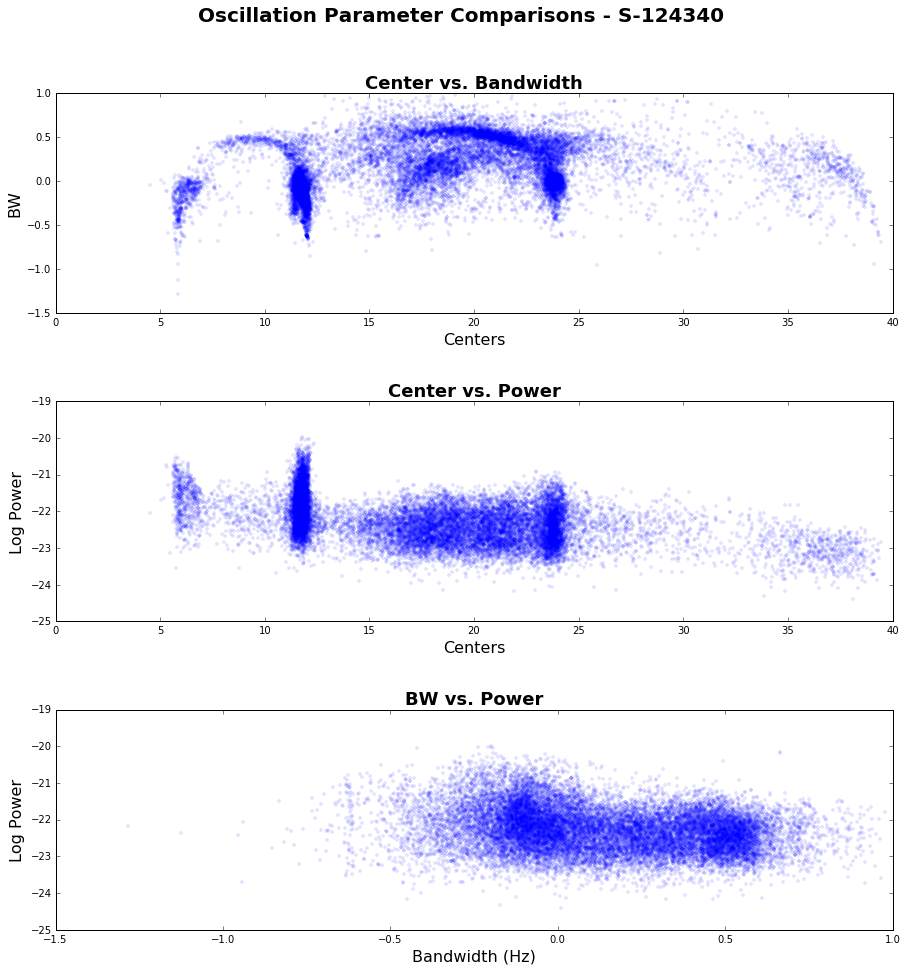

In [9]:
# Calculate correlations between oscillatory parameters and plot. 
meg_subj.plot_comparison()

### GROUP ANALYSIS

Group Analysis

In [10]:
# Initialize MegGroup object
meg_group = GroupMegData()

In [11]:
# Add current subjects to meg_group
osc = Osc()
for subj in sub_nums:
    meg_subj = MegData()                               # Initialize MegData object
    meg_subj.import_foof(subj)                         # Import subject data
    meg_subj.all_oscs()                                # Create vectors of all oscillations
    meg_subj.peak_freq(osc)                            # Calculate oscillatory parameters
    meg_subj.osc_bands_vertex(osc)                     # Get oscillations per band per vertex
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=True,               # Include all-osc data
                          add_vertex_bands=True)           # Include osc-band-vertex data

In [12]:
# Check how many subjects group includes
print('Currently analyzing ' + str(meg_group.nsubjs) + ' subjects.')

Currently analyzing 13 subjects.


Number of oscillations found across the whole group: 312827



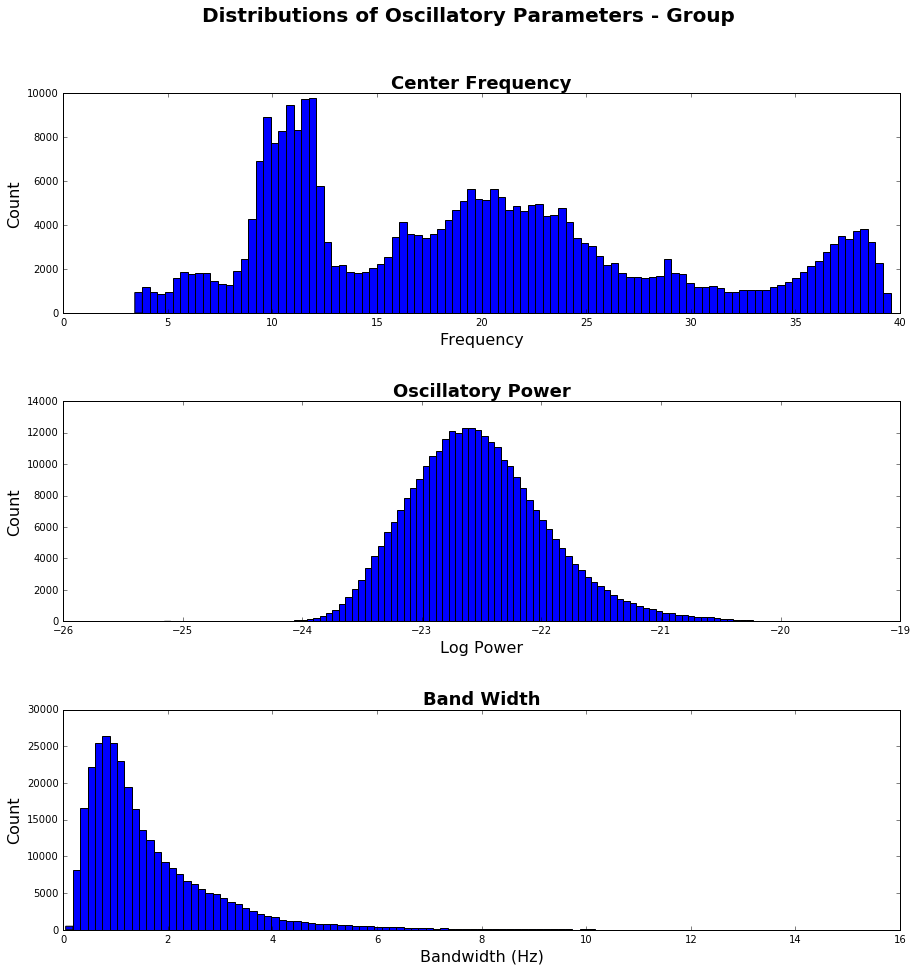

In [15]:
# Plot all oscillations across the group
print('Number of oscillations found across the whole group: ' + str(meg_group.nOscs_tot) + '\n')
meg_group.plot_all_oscs()

Center-BW Corr: 0.158588060327 with p of : 0.0
Center-Power Corr: -0.541524045457 with p of : 0.0
BW-Power Corr: -0.169294569619 with p of : 0.0


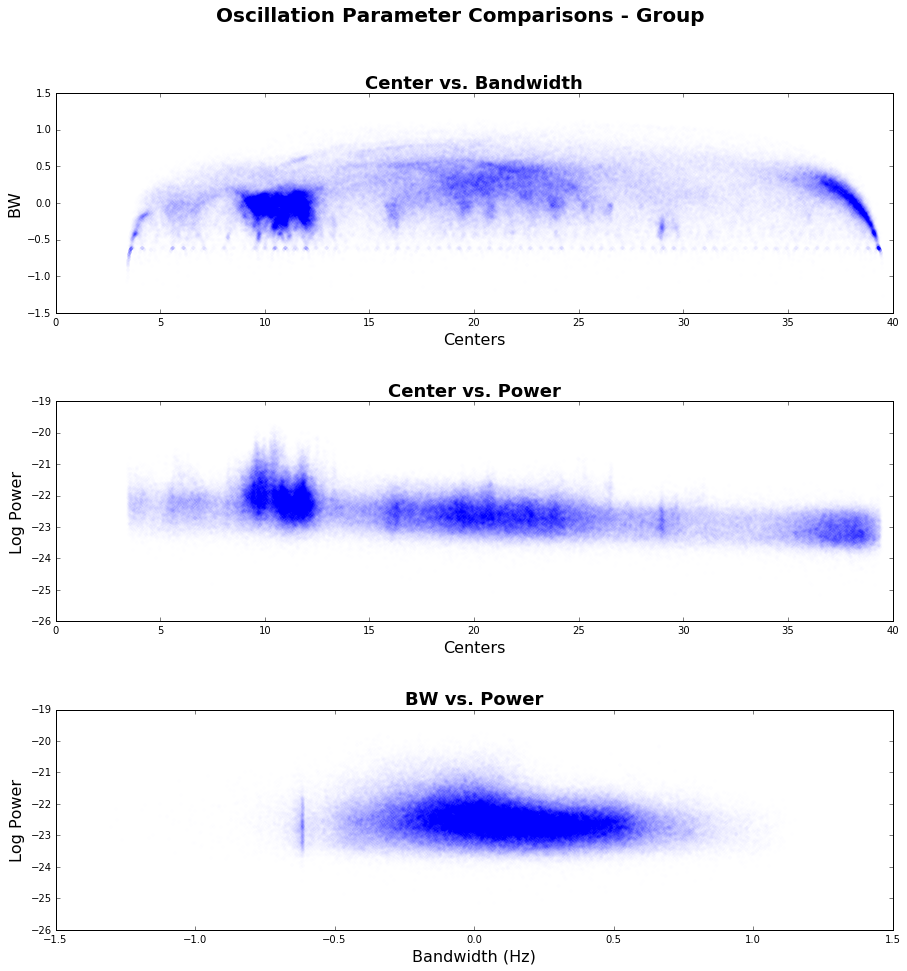

In [16]:
# Compare oscillation parameters across the whole group
meg_group.plot_comparison()

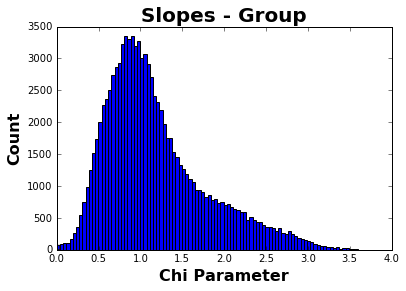

In [17]:
# Plot slopes across all 
meg_group.plot_slopes()

In [18]:
# Calculate probability of oscilation (band specific) across the cortex
meg_group.osc_vertex_prob()

In [19]:
# Save group osc-probability data for visualization with Brainstorm
meg_group.set_prob_vis()

## TESTING STUFF

Below is just testing out some other little things. 


In [ ]:
plt.hexbin(meg_group.centers_all, meg_group.bws_all)

In [ ]:
plt.plot(meg_group.age, meg_group.peak_alpha, '.')

from scipy.stats.stats import pearsonr
pearsonr(meg_group.age, meg_group.nOscs)


In [ ]:
plt.plot(meg_group.age, meg_group.peak_lowgamma, '.')

from scipy.stats.stats import pearsonr
pearsonr(meg_group.age, meg_group.peak_lowgamma)